In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('sentiment_train.csv')

In [4]:
df.sample(4)

Sentence  Polarity
1188                                 Waste of 13 bucks.         0
751   The wontons were thin, not thick and chewy, al...         1
2140  These are the central themes of the film and t...         0
191               Both of the egg rolls were fantastic.         1

In [5]:
df.shape

(2400, 2)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [8]:
#check for missing values
df.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

In [9]:
#renaming the columns
df.rename(columns={'Sentence':'text','Polarity':'target'},inplace=True)

In [12]:
df.head()

text  target
0                           Wow... Loved this place.       1
1                                 Crust is not good.       0
2          Not tasty and the texture was just nasty.       0
3  Stopped by during the late May bank holiday of...       1
4  The selection on the menu was great and so wer...       1

In [11]:
#check for duplicate values
df.duplicated().sum()

17

In [13]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [16]:
df.shape

(2383, 2)

## 2. EDA

In [17]:
df.head()

text  target
0                           Wow... Loved this place.       1
1                                 Crust is not good.       0
2          Not tasty and the texture was just nasty.       0
3  Stopped by during the late May bank holiday of...       1
4  The selection on the menu was great and so wer...       1

In [18]:
df['target'].value_counts()

0    1206
1    1177
Name: target, dtype: int64

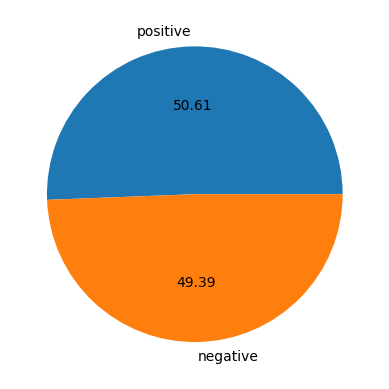

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['positive','negative'], autopct="%0.2f")
plt.show()

In [20]:
# Data is balanced

In [21]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 23.8 MB/s eta 0:00:00
     ---------------------------------------- 268.0/268.0 kB ? eta 0:00:00


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# number of characters in text
df['num_characters'] = df['text'].apply(len)

c:\Users\prans\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df.head()

text  target  num_characters
0                           Wow... Loved this place.       1              24
1                                 Crust is not good.       0              18
2          Not tasty and the texture was just nasty.       0              41
3  Stopped by during the late May bank holiday of...       1              87
4  The selection on the menu was great and so wer...       1              59

In [32]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

c:\Users\prans\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
df.head()

text  target  num_characters  \
0                           Wow... Loved this place.       1              24   
1                                 Crust is not good.       0              18   
2          Not tasty and the texture was just nasty.       0              41   
3  Stopped by during the late May bank holiday of...       1              87   
4  The selection on the menu was great and so wer...       1              59   

   num_words  
0          6  
1          5  
2          9  
3         16  
4         13

In [36]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

c:\Users\prans\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df.head()

text  target  num_characters  \
0                           Wow... Loved this place.       1              24   
1                                 Crust is not good.       0              18   
2          Not tasty and the texture was just nasty.       0              41   
3  Stopped by during the late May bank holiday of...       1              87   
4  The selection on the menu was great and so wer...       1              59   

   num_words  num_sentences  
0          6              2  
1          5              1  
2          9              1  
3         16              1  
4         13              1

In [38]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     2383.000000  2383.000000    2383.000000
mean        60.180025    12.889215       1.033991
std         37.970844     7.694873       0.185818
min          6.000000     1.000000       1.000000
25%         31.000000     7.000000       1.000000
50%         52.000000    11.000000       1.000000
75%         82.000000    17.000000       1.000000
max        336.000000    69.000000       3.000000

In [39]:
# positive reviews
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     1177.000000  1177.000000    1177.000000
mean        58.792693    12.524214       1.033985
std         38.114036     7.702127       0.185899
min          6.000000     1.000000       1.000000
25%         30.000000     7.000000       1.000000
50%         50.000000    11.000000       1.000000
75%         80.000000    17.000000       1.000000
max        336.000000    69.000000       3.000000

In [40]:
# negative reviews
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     1206.000000  1206.000000    1206.000000
mean        61.533997    13.245439       1.033997
std         37.797277     7.674247       0.185817
min          6.000000     2.000000       1.000000
25%         32.000000     7.000000       1.000000
50%         54.000000    12.000000       1.000000
75%         83.750000    18.000000       1.000000
max        270.000000    52.000000       3.000000

In [41]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

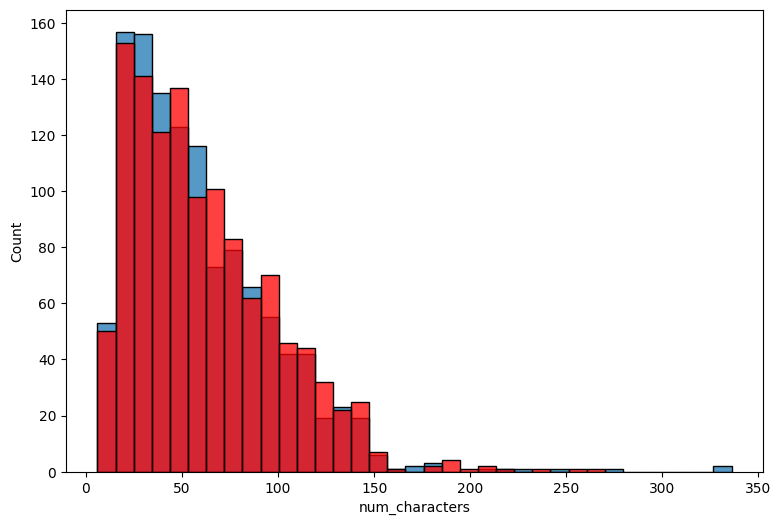

In [45]:
plt.figure(figsize=(9,6))
sns.histplot(df[df['target'] == 1]['num_characters'])
sns.histplot(df[df['target'] == 0]['num_characters'],color='red')

In [46]:
plt.figure(figsize=(9,6))
sns.histplot(df[df['target'] == 1]['num_words'])
sns.histplot(df[df['target'] == 0]['num_words'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

In [47]:
sns.pairplot(df,hue='target')

In [50]:
#feature correlation
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

## Data Preprocessing